# Cole Nussbaumer Knaflic - Storytelling with Data_ Let’s Practice! Exercises 2.9 and 2.10

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Exercise 2.9: let’s draw

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Product,Direct Sales,Indirect Sales,Total Sales
0,A,83,145,128
1,B,54,131,127
2,C,89,122,107
3,D,90,129,118


In [3]:
#Assuming a third sales team contributed to the total (average) sales column
data.insert(3, 'Other Sales', [156, 196, 110, 135], True)
data.head()

,Product,Direct Sales,Indirect Sales,Other Sales,Total Sales
0,A,83,145,156,128
1,B,54,131,196,127
2,C,89,122,110,107
3,D,90,129,135,118


## Exercise 2.10: practice in your tool

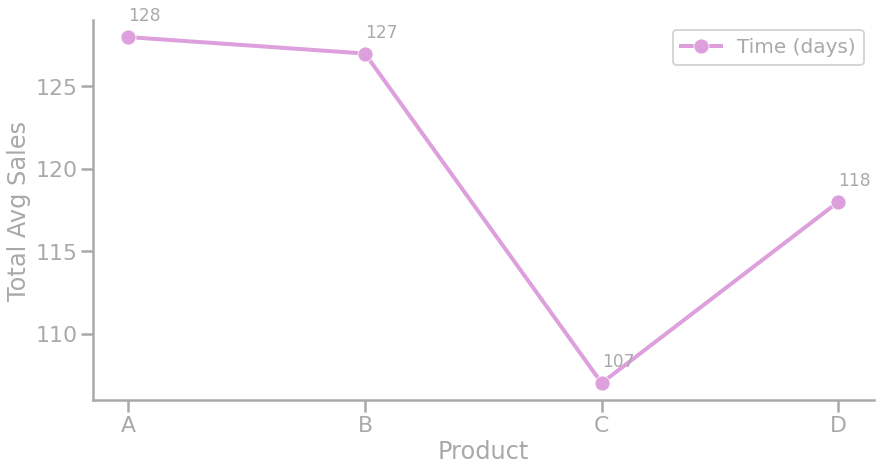

In [11]:
#Line graph of the average time in days of the sellings of four different products
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster") #to get a  better display 

fig, ax = plt.subplots()
fig = sns.lineplot(data=data, x='Product', y='Total Sales', 
             color = 'plum', linewidth=4, marker='o', markersize= 15)

#Labels and legend
fig.legend(['Time (days)'], ncol=3, loc="upper right", frameon=True, fontsize=20, labelcolor = 'darkgrey')
plt.xlabel('Product', color = 'darkgrey')
plt.ylabel('Total Avg Sales', color = 'darkgrey')

#Spines colors
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')

#Annotate the values
for v in data.iterrows():
    plt.text(v[1][0], v[1][4]+1, "{:,}".format(v[1][4]), fontsize = 17, color='darkgrey')

sns.despine() #To take the top and right axes off

plt.savefig('Avg time', dpi = 300, bbox_inches = 'tight')
plt.show()

In [5]:
#Melting the dataset in order to make a grouped bar chart with seaborn
df = data[['Product', 'Direct Sales', 'Indirect Sales','Other Sales']]
df = df.melt('Product', var_name='Sales Team',  value_name='Avg')
df

,Product,Sales Team,Avg
0,A,Direct Sales,83
1,B,Direct Sales,54
2,C,Direct Sales,89
3,D,Direct Sales,90
4,A,Indirect Sales,145
5,B,Indirect Sales,131
6,C,Indirect Sales,122
7,D,Indirect Sales,129
8,A,Other Sales,156
9,B,Other Sales,196


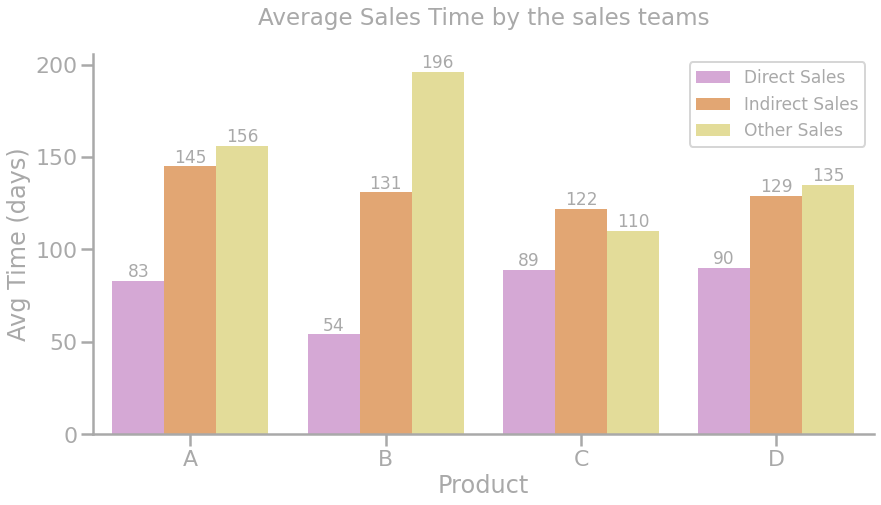

In [15]:
#Grouped bar chart of the different sales teams in their average time in days of four products
plt.rcParams["figure.figsize"] = (14, 7)
sns.set_context("poster")  #to get a  better display 

fig, ax = plt.subplots()
f = sns.barplot(x = 'Product', y = 'Avg', hue = 'Sales Team', data = df, palette= ['plum','sandybrown', 'khaki'])

#Labels and legend
ax.legend(loc='best', frameon=True, fontsize=17, labelcolor = 'darkgrey')
plt.title('Average Sales Time by the sales teams',  y=1.0, pad=29, size = 23, color = 'darkgrey')
plt.xlabel('Product', color = 'darkgrey')
plt.ylabel('Avg Time (days)', color = 'darkgrey')

#Spines colors
ax.spines['bottom'].set_color('darkgrey')
ax.spines['left'].set_color('darkgrey')

#Ticks colors
ax.tick_params(axis='x', colors='darkgrey')
ax.tick_params(axis='y', colors='darkgrey')

#Annotate the values of the bars
for p in f.patches:
    f.annotate("{:.0f}".format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9), size=17, color= 'darkgrey',
                   textcoords='offset points')

sns.despine() #To take the top and right axes off

plt.savefig('Sales teams avg', dpi = 300, bbox_inches = 'tight') #bbox_inches saves the whole graph and there is no cuts
plt.show()